In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr

In [2]:
sys.path.append('..')

In [3]:
list_a = ['(0, 4]',
'(4, 9]',
'(9, 14]',
 '(14, 19]',
'(19, 29]',
'(29, 39]',
'(39, 49]',
'(49, 59]',
'(59, 69]',
'(69, 79]',
'NO INFO']
list_b = ['0 (0, 4]','1 (4, 9]','2 (9, 14]','3 (14, 19]','4 (19, 29]','5 (29, 39]','6 (39, 49]','7 (49, 59]','8 (59, 69]','9 (69, 79]','NO INFO']
dict_ab = {list_a[i]: list_b[i] for i in range(len(list_a))}

In [4]:
file_path = '../Data/analyzed/basic_age_analysis.csv'
mun_path = '../Data/municipalities.csv'

df_file = pd.read_csv(file_path)
mun_file = pd.read_csv(mun_path)

In [5]:
mun_file['codigo'] = mun_file['municipio'].astype(str).str[:6].astype(int)
mun_file = mun_file[['municipio','name','codigo','pop_21']]

In [6]:
df_cases = df_file.groupby(['ID_MUNICIP'])['CASOS'].sum()
df_cases = df_cases.reset_index(name = 'CASOS_T')
df_cases = df_cases.merge(mun_file, how = 'left', left_on = 'ID_MUNICIP', right_on = 'codigo')
df_cases = df_cases.drop(columns = ['codigo'])
df_cases['CASOS_100'] = (df_cases['CASOS_T']/df_cases['pop_21'])*(10**5)

In [7]:
df_new = df_file.sort_values(['ID_MUNICIP','CASOS'], ascending=False).drop_duplicates('ID_MUNICIP').sort_index()
df_new = df_new.merge(df_cases, how = 'left', on = 'ID_MUNICIP' )

In [8]:
df_tmp = df_new.sort_values(by = 'CASOS_100',ascending = False)[:20]

In [9]:
df_new['GRUPO_IDADE'].value_counts()

(0, 4]      448
(19, 29]    231
(14, 19]     91
(29, 39]     34
(4, 9]       27
(39, 49]     19
(9, 14]      14
(49, 59]     11
(59, 69]      1
(69, 79]      1
Name: GRUPO_IDADE, dtype: int64

In [10]:
df_tmp['GRUPO_IDADE'].value_counts()

(19, 29]    9
(0, 4]      8
(4, 9]      1
(14, 19]    1
(9, 14]     1
Name: GRUPO_IDADE, dtype: int64

## Doing the maps

### Age group with the most cases 

In [11]:
df_new

,Unnamed: 0,ID_MUNICIP,GRUPO_IDADE,CASOS,VAC,N_VAC,I_VAC,SG_UF_NOT,CASOS_T,municipio,name,pop_21,CASOS_100
0,0,110004,"(0, 4]",1,1.0,0.0,0.0,11,1,1100049,Cacoal,86416,1.157193
1,1,110012,"(29, 39]",1,0.0,1.0,0.0,11,1,1100122,Ji-Paraná,131026,0.763207
2,2,110020,"(0, 4]",2,0.0,2.0,0.0,11,3,1100205,Porto Velho,548952,0.546496
3,4,110030,"(0, 4]",4,0.0,4.0,0.0,11,7,1100304,Vilhena,104517,6.697475
4,9,110146,"(9, 14]",2,2.0,0.0,0.0,11,4,1101468,Pimenteiras do Oeste,2127,188.058298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,2632,520870,"(0, 4]",5,0.0,4.0,1.0,52,11,5208707,Goiânia,1555626,0.707111
874,2636,521250,"(0, 4]",1,1.0,0.0,0.0,52,1,5212501,Luziânia,214645,0.465886
875,2637,521830,"(29, 39]",1,1.0,0.0,0.0,52,1,5218300,Posse,37924,2.636853
876,2638,521860,"(14, 19]",1,1.0,0.0,0.0,52,1,5218607,Rialma,10961,9.123255


In [12]:
map_br = geobr.read_municipality()

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-p

In [13]:
map_br = map_br.merge(df_new, how = 'left', left_on = 'code_muni', right_on = 'municipio')
map_br = map_br.fillna('NO INFO')

In [14]:
map_br['GRUPO_IDADE_2'] = map_br['GRUPO_IDADE'].replace(dict_ab)

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


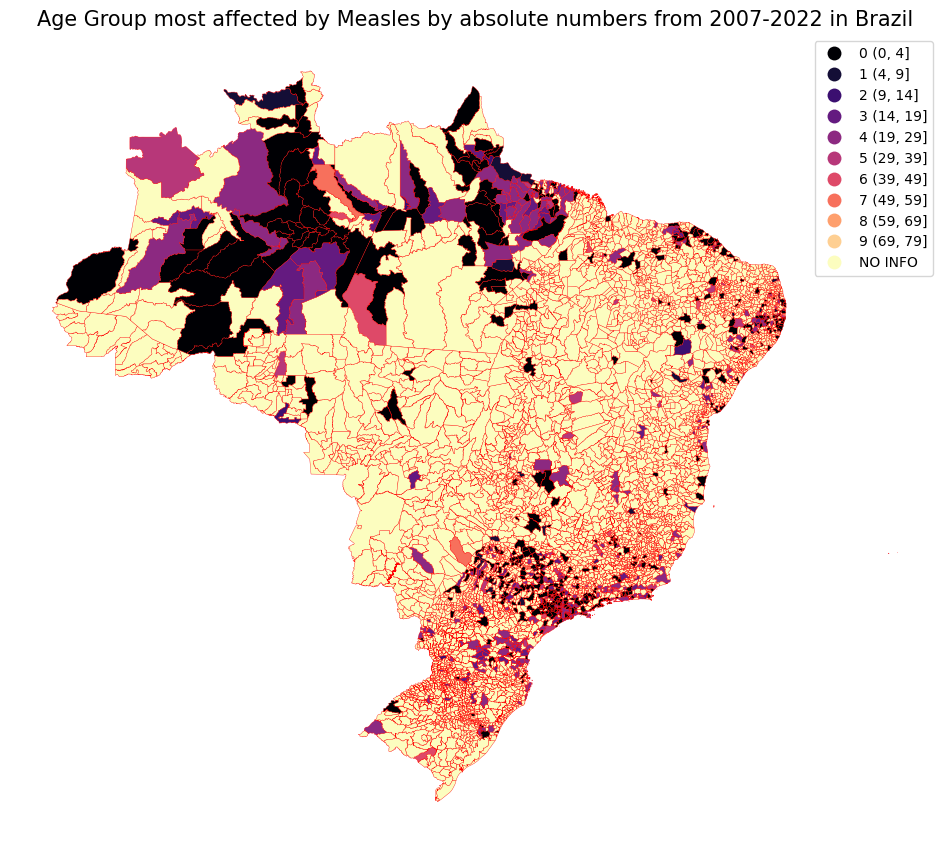

In [15]:
fig, axs = plt.subplots(figsize = (12,12))
map_br.plot(
    ax=axs, # Axis de destino do gráfico
    column="GRUPO_IDADE_2", # Coluna com os valores usados para colorir o mapa
    cmap="magma", # Mapa de cores
    edgecolor="red", # Cor dos contornos
    linewidth=0.25, # Espessura dos contornos
    legend = True,
)

axs.set_title(
    "Age Group most affected by Measles by absolute numbers from 2007-2022 in Brazil",
    fontdict={"fontsize": 15},
)

axs.axis("off") 
plt.savefig('basic_map.pdf')
plt.show()

### Age group with the most cases in the most affected states

In [22]:
map_am = geobr.read_municipality('AM')
map_rr = geobr.read_municipality('RR')
map_pa = geobr.read_municipality('PA')
map_lim = pd.concat([map_am,map_rr,map_pa])

In [23]:
map_lim = map_lim.merge(df_new, how = 'left', left_on = 'code_muni', right_on = 'municipio')
map_lim = map_lim.fillna('NO INFO')

In [24]:
map_lim['GRUPO_IDADE_2'] = map_lim['GRUPO_IDADE'].replace(dict_ab)

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


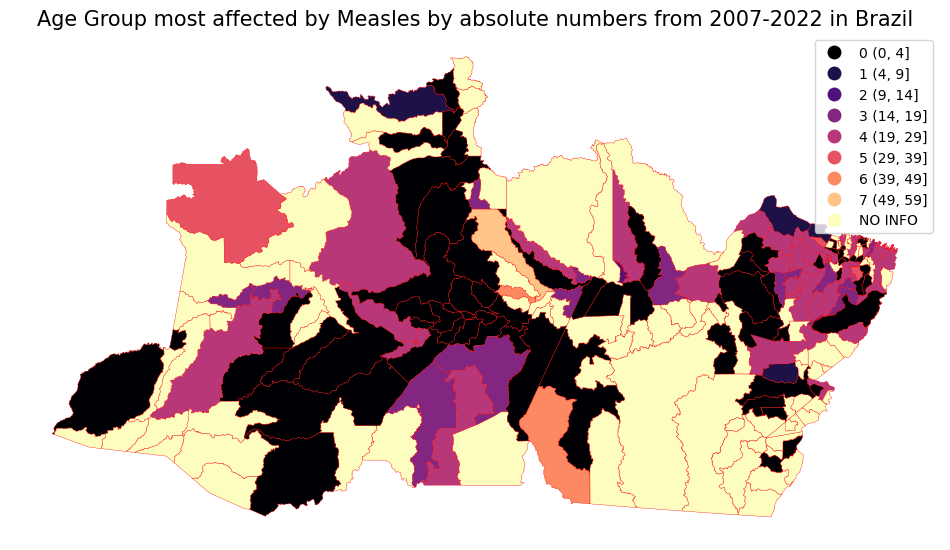

In [25]:
fig, axs = plt.subplots(figsize = (12,12))
map_lim.plot(
    ax=axs, # Axis de destino do gráfico
     column="GRUPO_IDADE_2", # Coluna com os valores usados para colorir o map
    cmap="magma", # Mapa de cores
    edgecolor="red", # Cor dos contornos
    linewidth=0.25, # Espessura dos contornos
    legend = True
)

axs.set_title(
    "Age Group most affected by Measles by absolute numbers from 2007-2022 in Brazil",
    fontdict={"fontsize": 15},
)

axs.axis("off") 
plt.savefig('basic_lim_map.pdf')
plt.show()